In [1]:
import modin.pandas as pd     
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from imblearn.over_sampling import SMOTE

from pycaret.classification import *

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
drop = ['var48', 'var27', 'var44', 'var51', 'y']
X = data.drop(drop, axis=1)
y = data['y']

In [4]:
data.head(10)

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
5,65,18,-999,-999,16114,208,-999,-999,-999,1,63,16938,7322,1247,2,58,58,22,5,943,2,1301,0,2,0,0,6,0,9,3,2,0,13,5,9,474,2,21,0,4,2,3,28,4,1,0,0,0,0,1,0,0,15,1,1,0.221367,0.497,0.101075,0.026035,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.000000,-999.00000,-999.000000,0.198529,0
6,69,5,89,1906,28845,9676,64,35,27,3,63,15320,3658,26,26,40,42,8,4,22,26,32,5,3,0,1,4,0,24,4,1,0,14,5,53,197,2,3,0,4,2,3,24,5,1,0,0,0,0,0,0,1,30,1,1,0.205834,0.014,1.000000,0.007534,0.141888,-999.000000,0.145790,0.035340,0.867810,0.014831,-999.000000,-999.00000,0.514706,0.224265,0
7,84,5,-999,-999,25373,9048,-999,-999,-999,1,63,27988,7556,399,26,13,11,11,4,307,26,426,4,3,0,0,7,0,24,4,2,0,21,3,55,607,21,7,8,4,9,3,27,8,1,0,0,0,0,0,0,0,34,1,1,0.273533,0.213,0.451613,0.018639,0.247192,-999.000000,0.703803,0.124198,0.828456,0.030033,-999.000000,-999.00000,-999.000000,0.301471,0
8,97,4,44,539,31622,50,2969,27,20,3,14,3359,8272,2292,19,22,22,10,4,1799,19,2422,5,3,0,1,7,1,25,4,1,0,20,4,30,9,31,7,0,4,10,3,19,9,1,0,0,0,0,0,0,0,16,3,1,0.204374,0.295,0.367742,0.067069,0.184499,0.160714,0.252895,0.050784,0.857719,0.015547,-999.000000,-999.00000,0.220588,0.143382,0
9,99,21,53,577,13528,1109,1746,35,27,3,63,13794,914,1317,26,1,3,3,3,1573,26,1372,5,3,2,4,1,0,24,4,2,0,16,5,58,591,2,2,0,4,4,3,26,7,1,0,0,0,0,0,1,0,15,1,1,0.206385,0.773,0.101075,0.131622,0.175693,-999.000000,0.492785,0.052694,0.891019,0.017476,-999.000000,-999.00000,0.161765,0.106618,0


In [5]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [6]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [7]:
def shape_data(df):
    print('Number of columns: ', df.shape[0])
    print('Number of rows: ', df.shape[1])

In [8]:
shape_data(data)
print('\n')
shape_data(data_resampled)

Number of columns:  14123
Number of rows:  70


Number of columns:  22546
Number of rows:  70


In [9]:
data_resampled.columns

Index(['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68', 'y'],
      dtype='object')

In [9]:
lista = ['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var45', 'var46', 'var47', 
       'var49', 'var50', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68']

       # 'var48', 'var27', 'var44', 'var51'

In [10]:
setup = setup(data=data_resampled, target='y', train_size=0.6, 
            verbose=True, remove_outliers=True, 
            session_id=42, outliers_threshold=0.10,
            feature_selection=True,
            feature_selection_threshold=0.40,
            numeric_features=lista)

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22546, 66)"
5,Missing Values,False
6,Numeric Features,65
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
X_train = get_config('X_train')

In [11]:
X_train

,var59,var68,var14,var48,var2,var28,var19,var36,var27,var67,...,var35,var8,var25,var44,var16,var1,var6,var42,var29,var5
16930,0.136914,0.218101,23.0,0.0,47.0,25.0,1341.0,22.0,0.0,0.129866,...,340.0,24.0,4.0,1.0,48.0,13.0,2058.0,26.0,4.0,10278.0
14602,0.277186,0.139517,17.0,0.0,58.0,23.0,1469.0,2.0,0.0,0.240699,...,482.0,-935.0,3.0,1.0,4.0,4.0,1118.0,24.0,3.0,1077.0
16159,0.246737,0.141258,20.0,0.0,44.0,7.0,1382.0,10.0,0.0,0.141111,...,112.0,21.0,1.0,1.0,28.0,15.0,793.0,23.0,4.0,9941.0
3195,0.124204,0.231618,10.0,0.0,89.0,3.0,196.0,30.0,1.0,0.073529,...,403.0,-999.0,4.0,1.0,77.0,4.0,2371.0,26.0,4.0,1469.0
21066,0.290465,0.139105,26.0,0.0,90.0,24.0,860.0,17.0,1.0,0.176806,...,586.0,-378.0,0.0,0.0,54.0,4.0,1767.0,29.0,4.0,7361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.241930,0.136029,26.0,0.0,44.0,24.0,1573.0,29.0,1.0,0.485294,...,225.0,-999.0,4.0,1.0,2.0,4.0,2453.0,21.0,4.0,5485.0
21575,0.131588,0.332465,25.0,0.0,-999.0,24.0,1510.0,30.0,0.0,-999.000000,...,117.0,-999.0,1.0,1.0,6.0,2.0,2431.0,12.0,4.0,6960.0
5390,-999.000000,0.106618,18.0,0.0,126.0,24.0,1573.0,28.0,1.0,0.294118,...,495.0,27.0,4.0,1.0,11.0,23.0,2086.0,24.0,4.0,6392.0
860,0.103844,0.117647,26.0,0.0,89.0,24.0,58.0,31.0,0.0,0.602941,...,89.0,27.0,1.0,1.0,3.0,20.0,1363.0,26.0,4.0,3740.0


In [12]:
best_model = compare_models(fold=5, exclude=['xgboost', 'catboost'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9138,0.9684,0.8997,0.9351,0.9170,0.8273,0.8280,0.3200
rf,Random Forest Classifier,0.9092,0.9651,0.8969,0.9293,0.9127,0.8181,0.8187,0.6900
gbc,Gradient Boosting Classifier,0.9045,0.9613,0.8929,0.9243,0.9083,0.8087,0.8093,1.6580
et,Extra Trees Classifier,0.9009,0.9600,0.8874,0.9227,0.9047,0.8017,0.8024,0.4700
ada,Ada Boost Classifier,0.8980,0.9553,0.8865,0.9182,0.9020,0.7957,0.7963,0.3960
dt,Decision Tree Classifier,0.8427,0.8413,0.8645,0.8428,0.8534,0.6838,0.6841,0.1020
lda,Linear Discriminant Analysis,0.8252,0.8992,0.8167,0.8479,0.8320,0.6500,0.6505,0.1100
ridge,Ridge Classifier,0.8247,0.0000,0.8169,0.8469,0.8316,0.6490,0.6495,0.0500
qda,Quadratic Discriminant Analysis,0.7997,0.8641,0.7707,0.8387,0.8029,0.5999,0.6026,0.0800
knn,K Neighbors Classifier,0.7652,0.8477,0.8884,0.7283,0.8004,0.5219,0.5374,0.3860


In [11]:
model = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8998,0.9624,0.8731,0.9338,0.9024,0.7998,0.8017
1,0.9122,0.9640,0.8978,0.9340,0.9155,0.8241,0.8248
2,0.9310,0.9781,0.9087,0.9592,0.9332,0.8620,0.8634
3,0.9113,0.9680,0.8978,0.9325,0.9148,0.8224,0.8231
4,0.9113,0.9684,0.8994,0.9311,0.9150,0.8222,0.8228
5,0.9228,0.9702,0.9195,0.9340,0.9267,0.8451,0.8452
6,0.9195,0.9751,0.9056,0.9405,0.9227,0.8387,0.8394
7,0.9080,0.9684,0.8870,0.9363,0.9110,0.8159,0.8172
8,0.9030,0.9672,0.8978,0.9177,0.9077,0.8056,0.8058
9,0.9080,0.9652,0.8824,0.9406,0.9105,0.8160,0.8178


In [14]:
tuned_model = tune_model(model, n_iter=40, search_library='scikit-optimize', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9138,0.9679,0.8947,0.9398,0.9167,0.8274,0.8285
1,0.9179,0.9768,0.8963,0.9461,0.9205,0.8357,0.8370
2,0.9216,0.9715,0.9102,0.9400,0.9249,0.8429,0.8433
3,0.9224,0.9734,0.9063,0.9451,0.9253,0.8446,0.8454
4,0.9113,0.9670,0.8909,0.9388,0.9142,0.8224,0.8236
Mean,0.9174,0.9713,0.8997,0.9420,0.9203,0.8346,0.8356
SD,0.0043,0.0036,0.0073,0.0030,0.0044,0.0086,0.0084


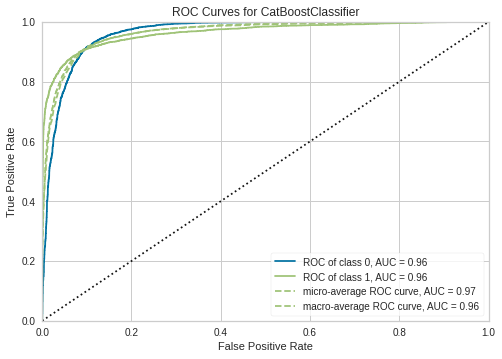

In [14]:
plot_model(tuned_model, plot='auc')

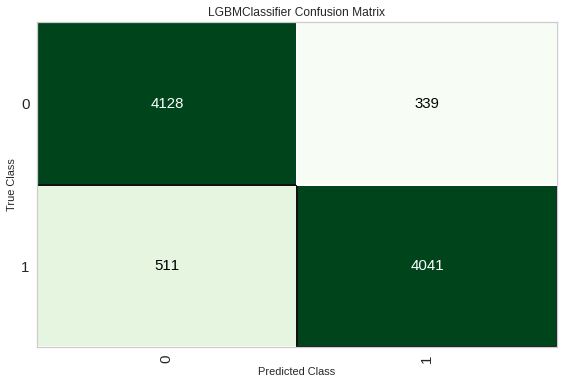

In [15]:
plot_model(model, plot='confusion_matrix')

In [16]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9076,0.9633,0.8877,0.9262,0.9066,0.8153,0.8161


In [16]:
final_model = finalize_model(tuned_model)

[LightGBM] [Warning] bagging_fraction is set=0.8693428230463085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8693428230463085
[LightGBM] [Warning] feature_fraction is set=0.4577345580691208, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4577345580691208
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8693428230463085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8693428230463085
[LightGBM] [Warning] feature_fraction is set=0.4577345580691208, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4577345580691208
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8693428230463085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8693428230463085
[LightGBM] [Warning] feature_fracti

In [17]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

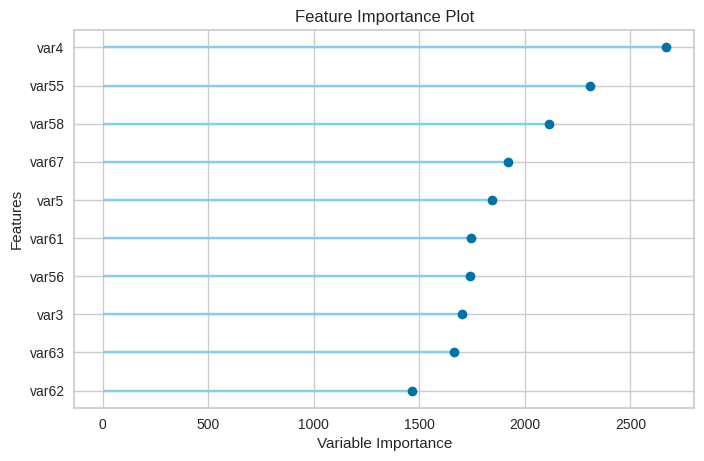

In [18]:
plot_model(final_model, plot='feature')

In [19]:
final_model

LGBMClassifier(bagging_fraction=0.8693428230463085, bagging_freq=7,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.4577345580691208, importance_type='split',
               learning_rate=0.03757372363150601, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001,
               min_split_gain=0.6218780960753265, n_estimators=300, n_jobs=-1,
               num_leaves=201, objective=None, random_state=42,
               reg_alpha=2.6311865922780104e-05, reg_lambda=0.0226764205815598,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [20]:
pred = predict_model(final_model, test)

In [21]:
pred

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var61,var62,var63,var64,var65,var66,var67,var68,Label,Score
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676,1,0.9704
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265,1,0.5012
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029,1,0.6088
3,7,4,53,419,743,7750,183,35,-999,3,...,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588,0,0.8126
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971,0,0.6788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,35297,4,126,1460,13335,9048,620,35,27,3,...,0.326307,0.132833,0.968718,0.039626,-999.0,-999.0,0.323529,0.253676,0,0.9828
21179,35298,18,19,532,14837,2590,855,27,20,3,...,0.229354,0.052108,0.940464,0.016952,-999.0,-999.0,0.088235,0.209559,0,0.9878
21180,35300,4,126,2923,16685,3162,1604,35,-999,3,...,0.179781,0.029155,0.745711,0.020158,-999.0,-999.0,0.205882,0.161765,1,0.8347
21181,35302,5,-999,-999,367,7637,1389,35,-999,3,...,0.149598,0.032583,0.891019,0.012596,-999.0,-999.0,-999.000000,0.246324,0,0.6162


In [22]:
sub_pred = pred[['id', 'Label']]

In [23]:
names_columns = {
    'id': 'id', 
    'Label': 'predicted'
}
sub_pred = sub_pred.rename(columns=names_columns)

In [24]:
sub_pred.to_csv('submission/09.csv', index=False)